# Collaborative Filtering


In [1]:
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

import sys
import os

# 뭔가 경로 설정을 제대로 해주고 싶은데 잘안되네 (다음에 해봐야겠다)

In [3]:
ratings = pd.read_csv("./dataset/toy_dataset.csv", index_col = 0)
ratings = ratings.fillna(0)
ratings.head()

,action1,action2,action3,romantic1,romantic2,romantic3
user 1,4.0,5.0,3.0,0.0,2.0,1.0
user 2,5.0,3.0,3.0,2.0,2.0,0.0
user 3,1.0,0.0,0.0,4.0,5.0,4.0
user 4,0.0,2.0,1.0,4.0,0.0,3.0
user 5,1.0,0.0,2.0,3.0,3.0,4.0


# Feature Scaling
* 목적: 다양한 range를 가진 Feature로 인해 올바른 분석이 이뤄지지 않음 <br>
e.g) Range가 클수록 더 많은 Weight가 부여되는 경향성을 가짐)

<hr>

* 이를 위해 두 가지 방법이 제시됌

<b> 1) Standarization (= Z-score Noramlization) </b> <br>
Feature가 N(0,1)의 분포를 띄도록 변형

<b> 2) Normalization </b> <br>
Mean Normalization =  (x - mean(x)) / (max(x) - min(x))
Min-Max Noramlization = (x - min(x)) / (max(x) - min(x))



In [37]:
def mean_normalize(col):  # 왜 row한테 줄까 (row가 아니라 column)
    return (col - col.mean()) / (col.max() - col.min())

ratings_std = ratings.apply(mean_normalize)
ratings_std


,action1,action2,action3,romantic1,romantic2,romantic3
user 1,0.36,0.6,0.400000,-0.65,-0.08,-0.35
user 2,0.56,0.2,0.400000,-0.15,-0.08,-0.60
user 3,-0.24,-0.4,-0.600000,0.35,0.52,0.40
user 4,-0.44,0.0,-0.266667,0.35,-0.48,0.15
user 5,-0.24,-0.4,0.066667,0.10,0.12,0.40


In [45]:
# we are taking a transpose since we want similarity between items which need to be in rows
# row 기준으로 similarity가 계산된다.
item_similarity = cosine_similarity(ratings_std.T)

In [48]:

item_similarity_df = pd.DataFrame(item_similarity, 
                                  index = ratings.columns,
                                columns = ratings.columns)


In [49]:

item_similarity_df


,action1,action2,action3,romantic1,romantic2,romantic3
action1,1.000000,0.706689,0.813682,-0.799411,-0.025392,-0.914106
action2,0.706689,1.000000,0.723102,-0.845154,-0.518999,-0.843374
action3,0.813682,0.723102,1.000000,-0.847946,-0.379980,-0.802181
romantic1,-0.799411,-0.845154,-0.847946,1.000000,0.148039,0.723747
romantic2,-0.025392,-0.518999,-0.379980,0.148039,1.000000,0.393939
romantic3,-0.914106,-0.843374,-0.802181,0.723747,0.393939,1.000000


In [62]:
def get_similar_movies(movie_name, user_rating):
    similar_score = item_similarity_df[movie_name] * (user_rating - 2.5)
    similar_score = similar_score.sort_values(ascending = False)
    return similar_score

In [78]:
get_similar_movies("action1",2)
get_similar_movies("romantic3",1)


action1      1.371159
action2      1.265061
action3      1.203271
romantic2   -0.590909
romantic1   -1.085620
romantic3   -1.500000
Name: romantic3, dtype: float64

In [79]:
action_lover = [("action1",5), ("romantic2",1), ("romantic3",1)]

similar_moives = pd.DataFrame()

for movie, rating in action_lover:
    similar_moives = similar_moives.append(get_similar_movies(movie, rating), ignore_index = True )
    



/var/folders/mh/jx8lklg147lb8j4rz9bcxl6w0000gn/T/ipykernel_80598/1177041202.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_moives = similar_moives.append(get_similar_movies(movie, rating), ignore_index = True )
/var/folders/mh/jx8lklg147lb8j4rz9bcxl6w0000gn/T/ipykernel_80598/1177041202.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_moives = similar_moives.append(get_similar_movies(movie, rating), ignore_index = True )
/var/folders/mh/jx8lklg147lb8j4rz9bcxl6w0000gn/T/ipykernel_80598/1177041202.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_moives = similar_moives.append(get_similar_movies(movie, rating), ignore_index = True )


In [122]:
similar_moives

,action1,action3,action2,romantic2,romantic1,romantic3
0,2.500000,2.034204,1.766722,-0.063480,-1.998527,-2.285265
1,0.038088,0.569970,0.778499,-1.500000,-0.222059,-0.590909
2,1.371159,1.203271,1.265061,-0.590909,-1.085620,-1.500000


In [84]:
similar_moives.sum().sort_values(ascending = False)

action1      3.909247
action2      3.810282
action3      3.807445
romantic2   -2.154389
romantic1   -3.306206
romantic3   -4.376174
dtype: float64

In [83]:
similar_moives

,action1,action3,action2,romantic2,romantic1,romantic3
0,2.500000,2.034204,1.766722,-0.063480,-1.998527,-2.285265
1,0.038088,0.569970,0.778499,-1.500000,-0.222059,-0.590909
2,1.371159,1.203271,1.265061,-0.590909,-1.085620,-1.500000


# 알고리즘 정리
* Cosine Similarity 사용하기

1) Item들간의 cosine similiarity를 구한다. p * p (p개의 item) <br>
2) 새로운 user가 평가한 항목을 사용한다. (get_similar_movies) <br>
3) 각 항목들을 더한후, sorting 한다. 

# 실습

In [100]:
ratings = pd.read_csv("./dataset/ratings.csv")
movies = pd.read_csv("./dataset/movies.csv")

In [101]:
ratings = pd.merge(movies,ratings).drop(["genres","timestamp"], axis = 1)

ratings.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [109]:
len(ratings.userId.unique())

610

In [110]:
# pivot table을 통해서 원하는 row, column을 만들 수 있다.
# 굉장히 유용하다.

user_ratings = ratings.pivot_table(index = ["userId"], columns = ["title"], values = "rating")
print(user_ratings.shape)


(610, 9719)


## 행/열

* 행(row) axis = 0 (행에 적용하겠다는 의미, 열은 보존)
* 열(column) axis = 1 (열에 적용하겠다는 의미, 행은 보존)

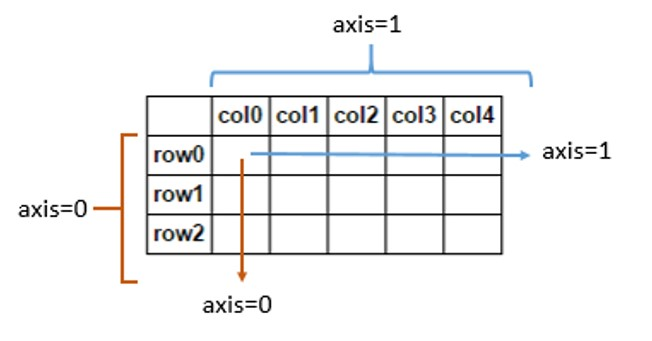

In [113]:
# 평가가 10명도 이뤄지지 않은 movie는 없애기

user_trainings = user_ratings.dropna(thresh = 10, axis = 1).fillna(0)
user_trainings.shape


(610, 2269)

In [120]:
item_similarity_df = user_trainings.corr(method = "pearson")
item_similarity_df.head()


title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518


In [127]:
def get_similary_movies(movie_name, user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating - 2.5)
    similar_score = similar_score.sort_values(ascending = False)
    return similar_score

In [128]:
temp = [("(500) Days of Summer (2009)",5),
       ("10 Cloverfield Lane (2016)",3),
       ("10,000 BC (2008)",3)]

In [131]:
recommend_movie = pd.DataFrame()
for movie, rating in temp:
    recommend_movie = recommend_movie.append(get_similary_movies(movie,rating))
    

/var/folders/mh/jx8lklg147lb8j4rz9bcxl6w0000gn/T/ipykernel_80598/3714201616.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommend_movie = recommend_movie.append(get_similary_movies(movie,rating))
/var/folders/mh/jx8lklg147lb8j4rz9bcxl6w0000gn/T/ipykernel_80598/3714201616.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommend_movie = recommend_movie.append(get_similary_movies(movie,rating))
/var/folders/mh/jx8lklg147lb8j4rz9bcxl6w0000gn/T/ipykernel_80598/3714201616.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommend_movie = recommend_movie.append(get_similary_movies(movie,rating))


In [135]:
recommend_movie.sum().sort_values(ascending= False).head(10)

title
(500) Days of Summer (2009)           2.668216
Silver Linings Playbook (2012)        1.415444
Up in the Air (2009)                  1.407991
Moonrise Kingdom (2012)               1.316991
Adventureland (2009)                  1.300058
Scott Pilgrim vs. the World (2010)    1.281894
Crazy, Stupid, Love. (2011)           1.272643
Zodiac (2007)                         1.264898
50/50 (2011)                          1.253757
Kick-Ass (2010)                       1.249843
dtype: float64

In [136]:
[(5,5) , (1,1)]

[(5, 5), (1, 1)]

In [139]:
import math

10 / (math.sqrt(50) + math.sqrt(2))

1.178511301977579